# 数据读取和处理

In [1]:
import numpy as np  
import pandas as pd  
path = r'D:\Documents\python_documents\Practical Business Data Analysis\case\CH4\st.csv'
data = pd.read_csv(path)  
data.head()

,year,ARA,ASSET,ATO,GROWTH,LEV,ROA,SHARE,ST
0,1999,0.192310,19.856048,0.0052,-0.950727,0.445880,0.087710,26.89,0
1,1999,0.220120,20.910863,0.0056,-0.942656,0.398686,0.016820,39.62,0
2,1999,0.325292,19.352623,0.0166,-0.937440,0.303348,0.042468,26.46,0
3,1999,0.025729,21.438928,0.0028,-0.852995,0.758250,0.018152,60.16,0
4,1999,0.533591,21.613339,0.2552,-0.816704,0.726875,0.004147,54.24,1


In [2]:
data['year'].value_counts().sort_index()     #统计数据集按年份分组的样本集

1999    684
2000    746
Name: year, dtype: int64

In [3]:
data_1999 = data[data['year']==1999].drop('year', axis=1)   #分离出1999年的数据用于建模
data_2000 = data[data['year']==2000].drop('year', axis=1)   #分离2000年的数据用于预测

# 描述性分析

## 直接从数据看各个变量的含义

In [4]:
data_1999.head()

,ARA,ASSET,ATO,GROWTH,LEV,ROA,SHARE,ST
0,0.192310,19.856048,0.0052,-0.950727,0.445880,0.087710,26.89,0
1,0.220120,20.910863,0.0056,-0.942656,0.398686,0.016820,39.62,0
2,0.325292,19.352623,0.0166,-0.937440,0.303348,0.042468,26.46,0
3,0.025729,21.438928,0.0028,-0.852995,0.758250,0.018152,60.16,0
4,0.533591,21.613339,0.2552,-0.816704,0.726875,0.004147,54.24,1


## 箱线图

### 应收账款与总资产比例（ARA）的分组箱线图

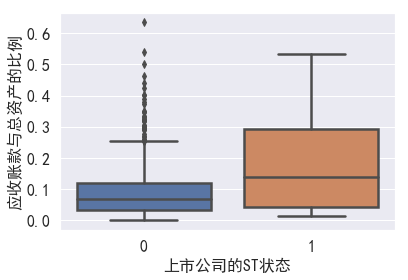

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())                      #seaborn解决中文乱码的问题
plt.rcParams['axes.unicode_minus']=False             #显示负号

ax = sns.boxplot(x="ST", y="ARA",
                  data=data_1999, linewidth=2.5)
plt.rcParams["figure.figsize"] = (4, 4)

plt.xticks(fontsize=16)  #旋转x轴刻度
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('应收账款与总资产的比例',fontsize=16)
plt.show()

### ST与其余6个自变量的箱线图

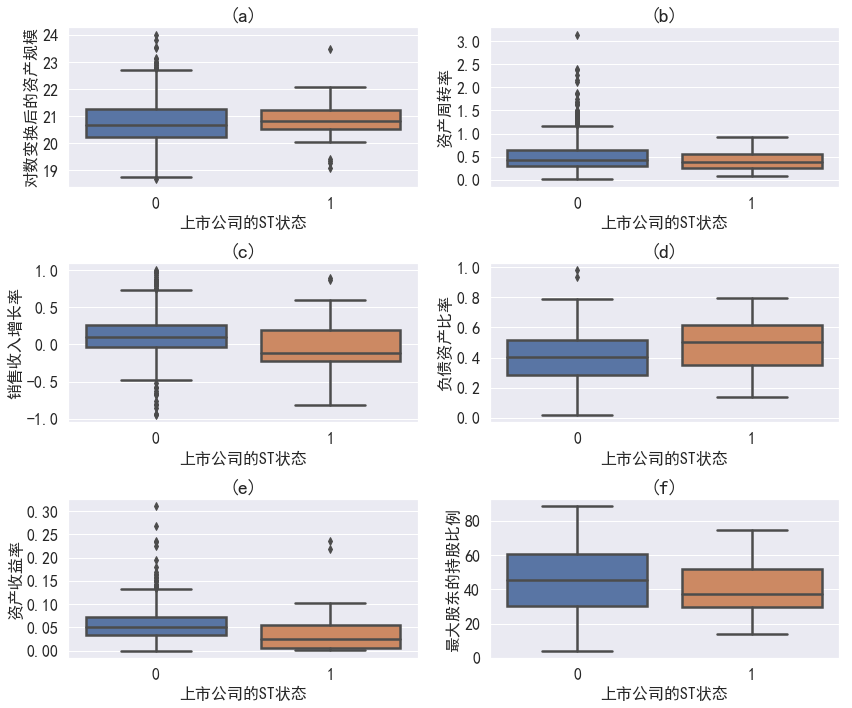

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()                                            #设置seaborn默认格式
    
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())                      #seaborn解决中文乱码的问题
plt.rcParams['axes.unicode_minus']=False             #显示负号

plt.rcParams['figure.figsize'] = (12, 10)             #设定图片大小
f = plt.figure()                                     #确定画布

f.add_subplot(3,2,1)
sns.boxplot(x="ST", y="ASSET",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('对数变换后的资产规模',fontsize=16)
plt.title("(a)", fontsize=20)                        #设置子图标题

f.add_subplot(3,2,2)
sns.boxplot(x="ST", y="ATO",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('资产周转率',fontsize=16)
plt.title("(b)", fontsize=20)                        #设置子图标题

f.add_subplot(3,2,3)
sns.boxplot(x="ST", y="GROWTH",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('销售收入增长率',fontsize=16)
plt.title("(c)", fontsize=20)                        #设置子图标题

f.add_subplot(3,2,4)
sns.boxplot(x="ST", y="LEV",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('负债资产比率',fontsize=16)
plt.title("(d)", fontsize=20)                        #设置子图标题

f.add_subplot(3,2,5)
sns.boxplot(x="ST", y="ROA",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('资产收益率',fontsize=16)
plt.title("(e)", fontsize=20)                        #设置子图标题

f.add_subplot(3,2,6)
sns.boxplot(x="ST", y="SHARE",
                  data=data_1999, linewidth=2.5)
plt.xticks(fontsize=16)       
plt.yticks(fontsize=16) 
plt.xlabel('上市公司的ST状态', fontsize=16)
plt.ylabel('最大股东的持股比例',fontsize=16)
plt.title("(f)", fontsize=20)                        #设置子图标题

#plt.subplots_adjust(wspace=0.3)                    #调整两幅子图的间距
plt.tight_layout()
plt.savefig('0-1回归：6幅箱线图.png',dpi=600)
plt.show()

# 多变量逻辑回归

##  先以空模型：logit{P(ST=1)} = $\beta_0$ 进行逻辑回归

In [8]:
import pandas as pd
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import pylab as pl
import numpy as np


glm0_1999 = smf.glm('ST~1', data_1999, family=sm.families.Binomial(sm.families.links.logit))
res = glm0_1999.fit()
print(res.summary())

# #aic = smf.glm(
#                 formula=formula, data=data,
#                 family=sm.families.Binomial(sm.families.links.logit)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      683
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -141.04
Date:                Mon, 15 Jul 2019   Deviance:                       282.07
Time:                        18:32:55   Pearson chi2:                     684.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8904      0.171    -16.880      0.000      -3.226      -2.555


## 再以全模型进行逻辑回归： logit{P(ST=1)} = $\beta_0$ + $\beta_1$  x ARA + $\beta_2$ x ASSET + $\beta_3$ x ATO + $\beta_4$ x GROWTH  + $\beta_5$ x LEV + $\beta_6$ x ROA + $\beta_7$ x SHARE

In [30]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999_logit = smf.glm('ST~ARA + ASSET + ATO + GROWTH + LEV + ROA + SHARE', data_1999,
                          family=sm.families.Binomial(sm.families.links.logit))
res_logit = glm1_1999_logit.fit()
print(res_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      676
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.75
Date:                Mon, 15 Jul 2019   Deviance:                       251.51
Time:                        19:16:58   Pearson chi2:                     649.
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8692      4.636     -1.913      0.056     -17.955       0.217
ARA            4.8797      1.492      3.270      0.0

## 通过似然比检验一组因素的整体显著性:      

### 空模型与全模型的Deviance项的差是30.56，而自由度为7（全模型与空模型的Df Model之差）。接着在excel用如下公式计算“=CHIDIST(30.56,7)”，得到P值为7.49311E-05。此说明模型的显著性很高，也就意味着我们所考虑的七个解释性变量中，至少有一个与企业是否被ST显著相关。当改用probit回归后，仍然有上述似然比检验一样的结果，这里不再讨论。

## Z检验讨论各个自变量的显著性

### 由全模型的logit回归分析结果可知，在0.01的显著性水平下，ARA显著正相关；在0.10的显著性水平下LEV高度正相关。

## 进行全模型的probit回归

In [36]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

res_probit = smf.glm('ST~ARA + ASSET + ATO + GROWTH + LEV + ROA + SHARE', data_1999,
                           family=sm.families.Binomial(sm.families.links.probit)).fit()
print(res_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      676
Model Family:                Binomial   Df Model:                            7
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -125.18
Date:                Mon, 15 Jul 2019   Deviance:                       250.37
Time:                        19:21:11   Pearson chi2:                     650.
No. Iterations:                     9   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9545      2.223     -2.229      0.026      -9.311      -0.598
ARA            2.6467      0.787      3.361      0.0

### 观察发现，probit基本结论同logit一致，但唯一不同的是，在0.10的显著性水平下，GROWTH与因变量ST有显著负相关的关系

## 用probit拟合挑选出的ARA、GROWTH、LEV三个变量

In [15]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999 = smf.glm('ST~ARA + GROWTH + LEV', data_1999, family=sm.families.Binomial(sm.families.links.probit))
res_probit_3 = glm1_1999.fit()
print(res_probit_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                            3
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.53
Date:                Mon, 15 Jul 2019   Deviance:                       253.06
Time:                        18:44:21   Pearson chi2:                     734.
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4468      0.262     -9.345      0.000      -2.960      -1.934
ARA            2.7331      0.749      3.648      0.0

## 用logit拟合挑选出的ARA、GROWTH、LEV三个变量

In [16]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999 = smf.glm('ST~ARA + GROWTH + LEV', data_1999, family=sm.families.Binomial(sm.families.links.logit))
res_logit_3 = glm1_1999.fit()
print(res_logit_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -127.02
Date:                Mon, 15 Jul 2019   Deviance:                       254.04
Time:                        18:47:42   Pearson chi2:                     663.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6022      0.565     -8.152      0.000      -5.709      -3.496
ARA            5.1301      1.434      3.577      0.0

# 模型选择

## logit回归基于AIC的变量选择

In [18]:
X = data_1999.drop('ST',axis=1)
Y = data_1999['ST']
X.head()
type(Y)

pandas.core.series.Series

In [19]:
import statsmodels.api as sm
import itertools

predictorcols = list(X.columns)   #将各个自变量汇成一个列表
AICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.Logit(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

from collections import Counter
c = Counter(AICs)   #AICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-4:-1]  #出现次数最少的10个元素，对应这里aic最小的3个值。接着倒序排列。

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.191312
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.203471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200356
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201898
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204269
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190256
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189831
  

Optimization terminated successfully.
         Current function value: 0.195687
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.198250
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.193976
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192520
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195436
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197621
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192903
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191942
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195597
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195347
  

[(('ARA', 'GROWTH', 'LEV'), 262.03621504823144),
 (('ARA', 'LEV'), 262.83264298633367),
 (('ARA', 'ATO', 'LEV'), 263.3268585767164)]

### AIC选择了ARA、GROWTH、LEV三个变量，下面参数估计

In [20]:
X_2000 = data_2000.drop('ST', axis=1)

In [31]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999 = smf.glm('ST~ARA + GROWTH + LEV', data_1999, family=sm.families.Binomial(sm.families.links.logit))
res_aic_logit = glm1_1999.fit()
print(res_aic_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -127.02
Date:                Mon, 15 Jul 2019   Deviance:                       254.04
Time:                        19:17:27   Pearson chi2:                     663.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6022      0.565     -8.152      0.000      -5.709      -3.496
ARA            5.1301      1.434      3.577      0.0

## probit回归基于AIC的变量选择

In [22]:
import statsmodels.api as sm
import itertools

predictorcols = list(X.columns)   #将各个自变量汇成一个列表
AICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.Probit(Y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

from collections import Counter
c = Counter(AICs)   #AICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-4:-1]  #出现次数最少的3个元素，对应这里aic最小的3个值。接着倒序排列。

Optimization terminated successfully.
         Current function value: 0.191222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205945
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.203425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200935
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.200428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.202909
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.189908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.189105
  

Optimization terminated successfully.
         Current function value: 0.196509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.197863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.193454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.192019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.196582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.195571
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.193201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.183767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.186896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.186440
  

[(('ARA', 'GROWTH', 'LEV'), 261.0581725471816),
 (('ARA', 'ASSET', 'GROWTH', 'LEV'), 262.1005231295319),
 (('ARA', 'GROWTH', 'LEV', 'SHARE'), 262.3999588832613)]

In [34]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

res_aic_probit = smf.glm('ST~ARA + GROWTH + LEV', data_1999, family=sm.families.Binomial(sm.families.links.probit)).fit()
print(res_aic_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                            3
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.53
Date:                Mon, 15 Jul 2019   Deviance:                       253.06
Time:                        19:19:55   Pearson chi2:                     734.
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4468      0.262     -9.345      0.000      -2.960      -1.934
ARA            2.7331      0.749      3.648      0.0

##  logit基于BIC变量选择

In [24]:
import statsmodels.api as sm
import itertools

predictorcols = list(X.columns)   #将各个自变量汇成一个列表
BICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.Logit(Y, predictors2)
        res = est.fit()
        BICs[variables] = res.bic

from collections import Counter
c = Counter(BICs)   #BICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-4:-1]  #出现次数最少的3个元素，对应这里bic最小的3个值。接着倒序排列。

Optimization terminated successfully.
         Current function value: 0.191312
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.203471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200356
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.201898
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.204269
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190256
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.189831
  

Optimization terminated successfully.
         Current function value: 0.186202
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185102
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192766
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191395
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.194814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.195132
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192232
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.191695
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.184582
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.183857
  

[(('ARA',), 274.77059641722514),
 (('ARA', 'LEV'), 276.4165167392013),
 (('ARA', 'GROWTH'), 279.2721914595628)]

### logit下BIC仅选择了ARA一个变量，下面参数估计

In [32]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

glm1_1999 = smf.glm('ST~ARA', data_1999, family=sm.families.Binomial(sm.families.links.logit))
res_bic_logit = glm1_1999.fit()
print(res_bic_logit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      682
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -130.86
Date:                Mon, 15 Jul 2019   Deviance:                       261.71
Time:                        19:17:48   Pearson chi2:                     684.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6834      0.272    -13.531      0.000      -4.217      -3.150
ARA            6.3316      1.313      4.821      0.0

## Probit基于BIC的变量选择

In [27]:
import statsmodels.api as sm
import itertools

predictorcols = list(X.columns)   #将各个自变量汇成一个列表
BICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.Probit(Y, predictors2)
        res = est.fit()
        BICs[variables] = res.bic

from collections import Counter
c = Counter(BICs)   #BICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-4:-1]  #出现次数最少的3个元素，对应这里bic最小的3个值。接着倒序排列。

Optimization terminated successfully.
         Current function value: 0.191222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205945
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.203425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.200935
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.200428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.202909
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.189908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.190655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.189105
  

Optimization terminated successfully.
         Current function value: 0.193454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.192019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.196582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.195571
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.193201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.183767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.186896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.186440
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.185750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.185256
  

[(('ARA',), 274.6474707636825),
 (('ARA', 'LEV'), 276.03312490427965),
 (('ARA', 'GROWTH'), 278.2789604135076)]

In [33]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

res_bic_probit = smf.glm('ST~ARA', data_1999, family=sm.families.Binomial(sm.families.links.probit)).fit()
print(res_bic_probit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ST   No. Observations:                  684
Model:                            GLM   Df Residuals:                      682
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -130.80
Date:                Mon, 15 Jul 2019   Deviance:                       261.59
Time:                        19:19:25   Pearson chi2:                     696.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0050      0.125    -16.030      0.000      -2.250      -1.760
ARA            3.2022      0.701      4.565      0.0

## AIC选择了三个变量，而BIC仅选择了一个变量。暂时无法判定哪个模型更好。作者王汉生说，一般经验是：BIC选择的模型更简单，但是AIC选择的模型预测精度似乎更好。

# 预测和评估

## 生成混淆矩阵

In [28]:
X_2000 = data_2000.drop('ST', axis=1)
Y_2000 = data_2000['ST']
Y_2000.head()

684    0
685    1
686    0
687    0
688    0
Name: ST, dtype: int64

logit回归的全模型:  AUC   0.7223997808419322
logit回归的AIC模型:  AUC   0.7202082001643686
logit回归的BIC模型:  AUC   0.6409764709463368
probit回归的全模型:  AUC   0.7168903905275014
probit回归的AIC模型: AUC   0.7228563601497581
probit回归的BIC模型: AUC   0.6409764709463368


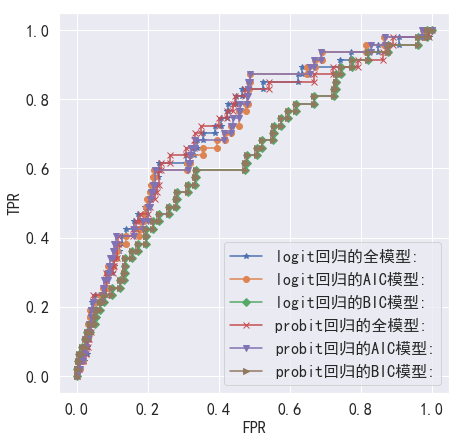

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False             #显示负号

models = [] 
models.append(("logit回归的全模型: ", res_logit, '*'))
models.append(("logit回归的AIC模型: ", res_aic_logit, 'o'))
models.append(("logit回归的BIC模型: ", res_bic_logit,  'D'))
models.append(("probit回归的全模型: ", res_probit, 'x'))
models.append(("probit回归的AIC模型:", res_aic_probit, 'v'))
models.append(("probit回归的BIC模型:", res_bic_probit, '>'))
f = plt.figure(figsize=(7, 7))
for clf_name, clf, marker in models:    
    Y_pred = clf.predict(X_2000)
    fpr, tpr, threshold = roc_curve(Y_2000, Y_pred)
    plt.plot(fpr, tpr, label=clf_name, marker=marker)
    print(clf_name, "AUC  ", auc(fpr, tpr))
    plt.legend(fontsize=16)
plt.xticks(fontsize=16)    #设置x轴刻度值的字体大小
plt.yticks(fontsize=16)    #设置y轴刻度值的字体大小  
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.show()